<a id='setup'></a>
## 1. Setup and Imports

In [1]:
# Install if needed (uncomment)
# !pip install -e ..

import numpy as np
from qiskit import QuantumRegister

# Import from qc_amp package
from qc_amp import (
    GELL_MANN_MATRICES,
    UNITARY_ADJUSTED_MATRICES,
    su3_structure_constants,
    compute_colour_factor,
)
from qc_amp.gates import (
    A_gate, B_gate, Lambda_gate, M_gate, Q_gate,
    G_prime_gate, G_gate,
)
from qc_amp.circuits import (
    R_quark_prep, R_gluon_prep, quark_emission_absorption,
)
from qc_amp.colour_factors import format_colour_factor_result

print("QC-Amp loaded successfully!")

QC-Amp loaded successfully!


<a id='su3'></a>
## 2. SU(3) Group Theory

The package provides the 8 Gell-Mann matrices (generators of SU(3)) and their unitary-adjusted versions.

In [2]:
# Display a Gell-Mann matrix
print("Gell-Mann matrix λ₁:")
print(GELL_MANN_MATRICES[0])

print("\nUnitary-adjusted matrix λ̂₁:")
print(UNITARY_ADJUSTED_MATRICES[0])

Gell-Mann matrix λ₁:
[[0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]]

Unitary-adjusted matrix λ̂₁:
[[0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j]]


In [3]:
# Check unitarity of adjusted matrices
def check_unitary(M):
    return np.allclose(M @ M.conj().T, np.eye(3))

for i, l in enumerate(UNITARY_ADJUSTED_MATRICES, 1):
    print(f"λ̂_{i} is unitary: {check_unitary(l)}")

λ̂_1 is unitary: True
λ̂_2 is unitary: True
λ̂_3 is unitary: True
λ̂_4 is unitary: True
λ̂_5 is unitary: True
λ̂_6 is unitary: True
λ̂_7 is unitary: True
λ̂_8 is unitary: True


In [4]:
# Structure constants f_abc
f_abc = su3_structure_constants()

print("Some non-zero structure constants:")
for key, val in list(f_abc.items())[:5]:
    print(f"  f_{key} = {val.real:.4f}")

Some non-zero structure constants:
  f_(1, 2, 3) = 1.0000
  f_(1, 3, 2) = -1.0000
  f_(1, 4, 7) = 0.5000
  f_(1, 5, 6) = -0.5000
  f_(1, 6, 5) = 0.5000


<a id='gates'></a>
## 3. Quantum Gates

The package implements various quantum gates for colour factor calculations.

In [5]:
# Create registers
gluon = QuantumRegister(3, 'g')
quark = QuantumRegister(2, 'q')
anti_quark = QuantumRegister(2, 'q̄')
U = QuantumRegister(3, 'U')

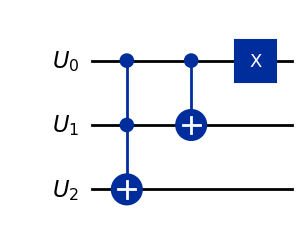

In [6]:
# A gate (increment operator)
A_circ = A_gate(U)
A_circ.draw('mpl')

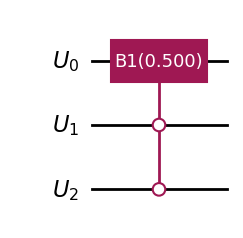

In [7]:
# B gate (controlled rotation)
B_circ = B_gate(0.5, U)
B_circ.draw('mpl')

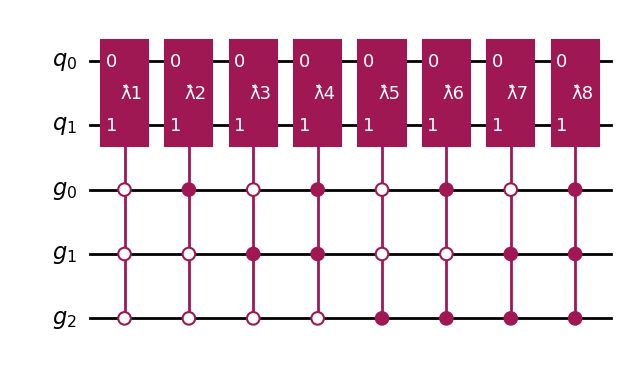

In [8]:
# Lambda gate (gluon-controlled colour rotation)
Lambda_circ = Lambda_gate(quark, gluon)
Lambda_circ.draw('mpl')

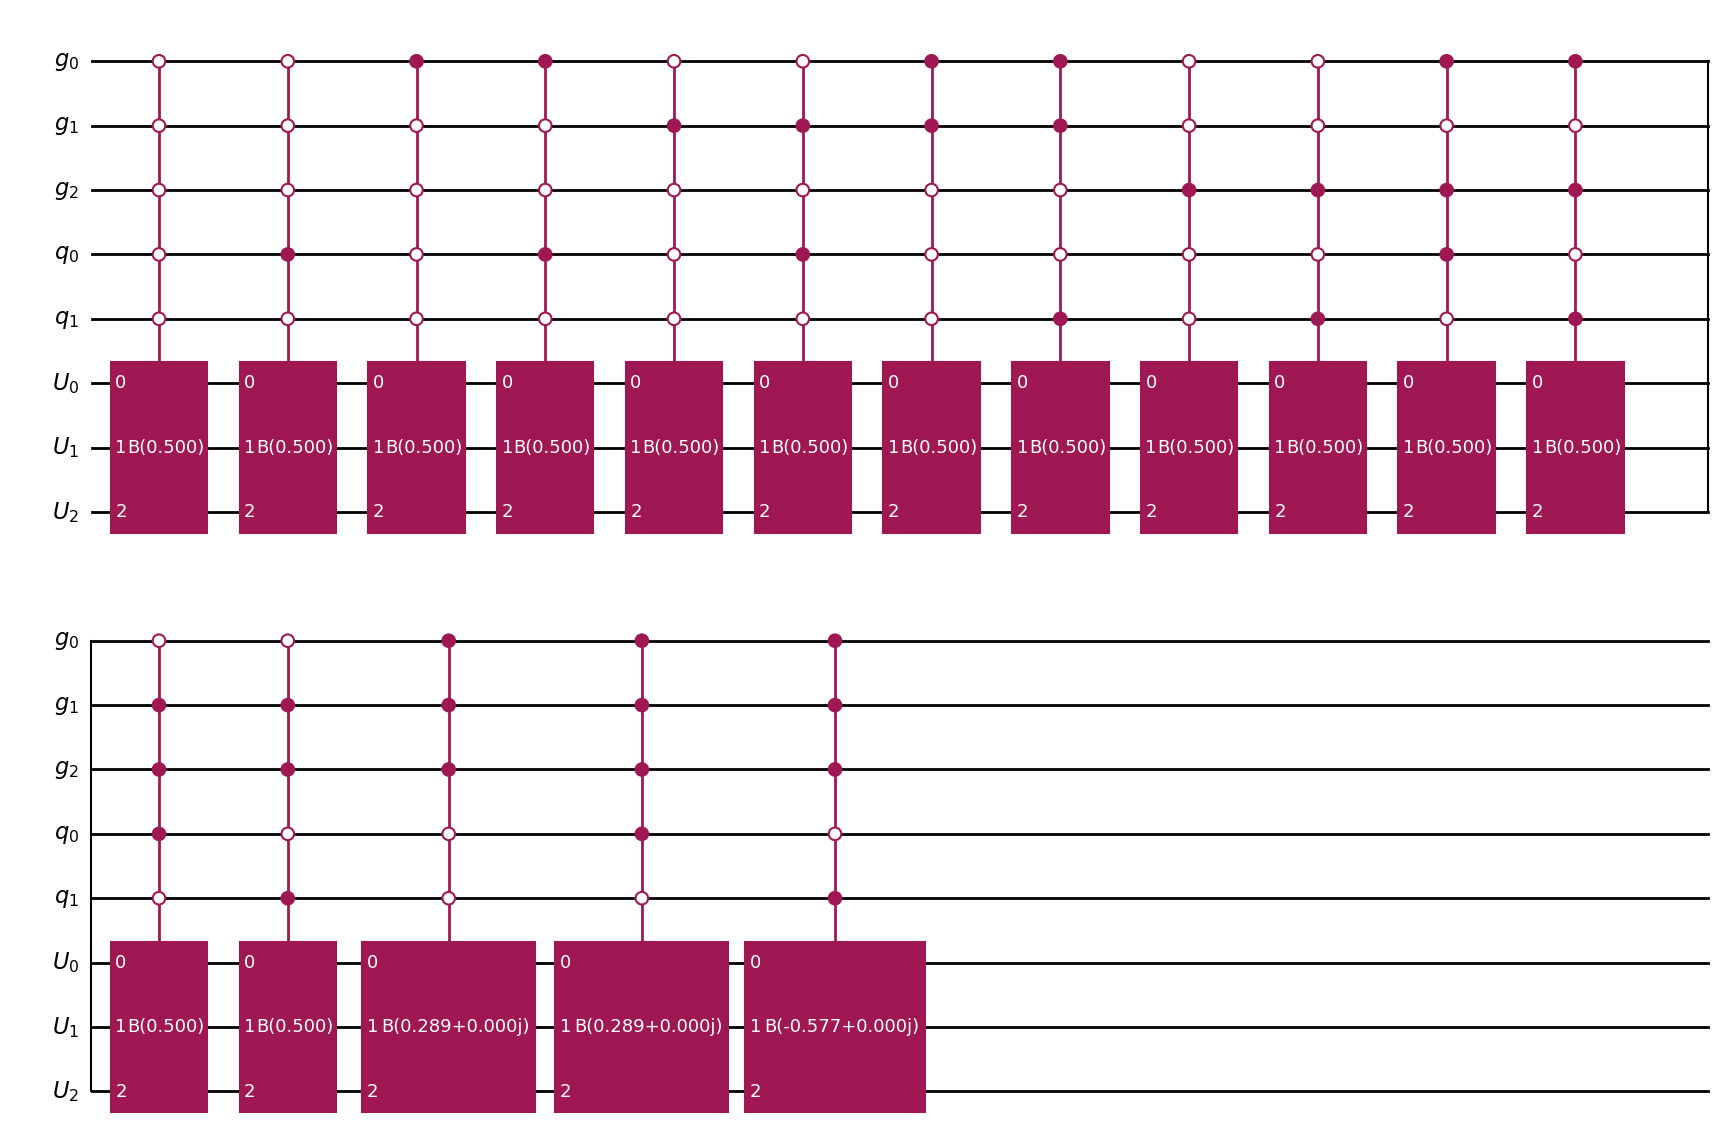

In [9]:
# M gate (unitarisation correction)
M_circ = M_gate(gluon, quark, U)
M_circ.draw('mpl')

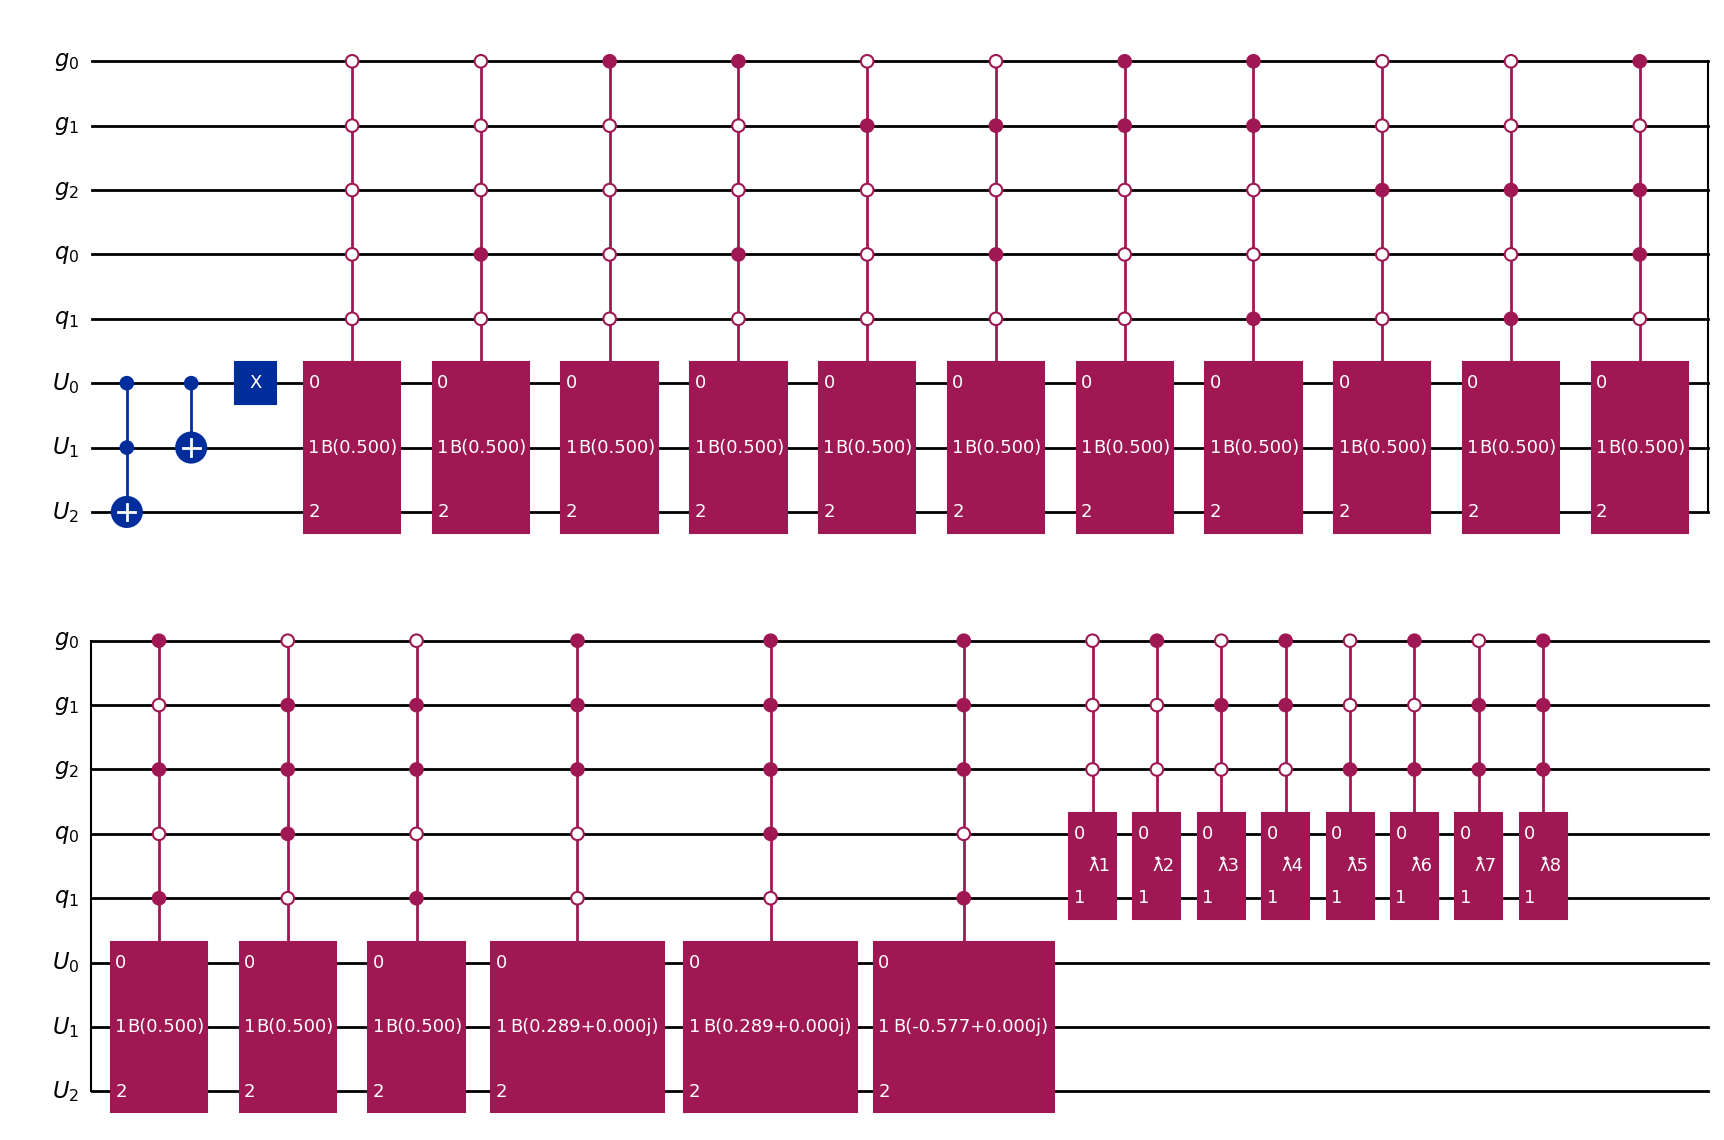

In [10]:
# Q gate (complete quark-gluon vertex)
Q_circ = Q_gate(gluon, quark, U)
Q_circ.draw('mpl')

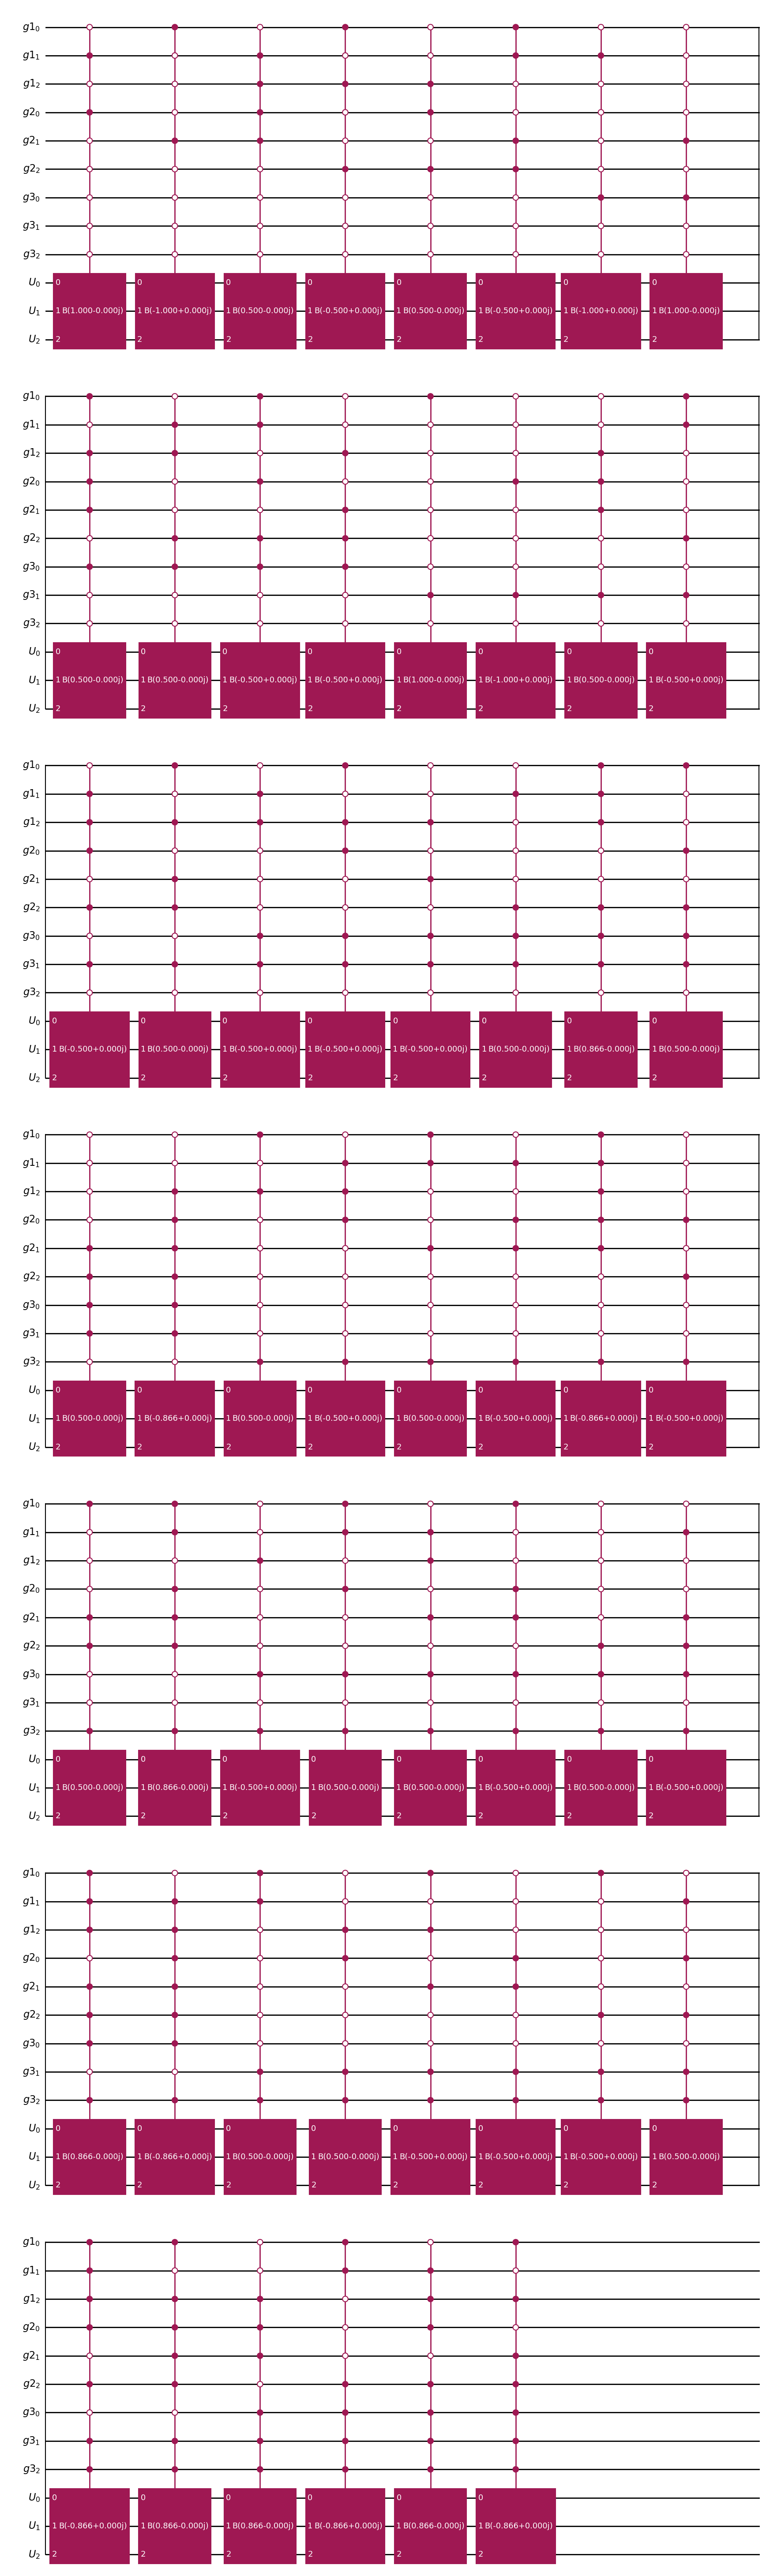

In [11]:
# Triple-gluon gates
g1 = QuantumRegister(3, 'g1')
g2 = QuantumRegister(3, 'g2')
g3 = QuantumRegister(3, 'g3')

G_prime_circ = G_prime_gate(g1, g2, g3, U)
G_prime_circ.draw('mpl')

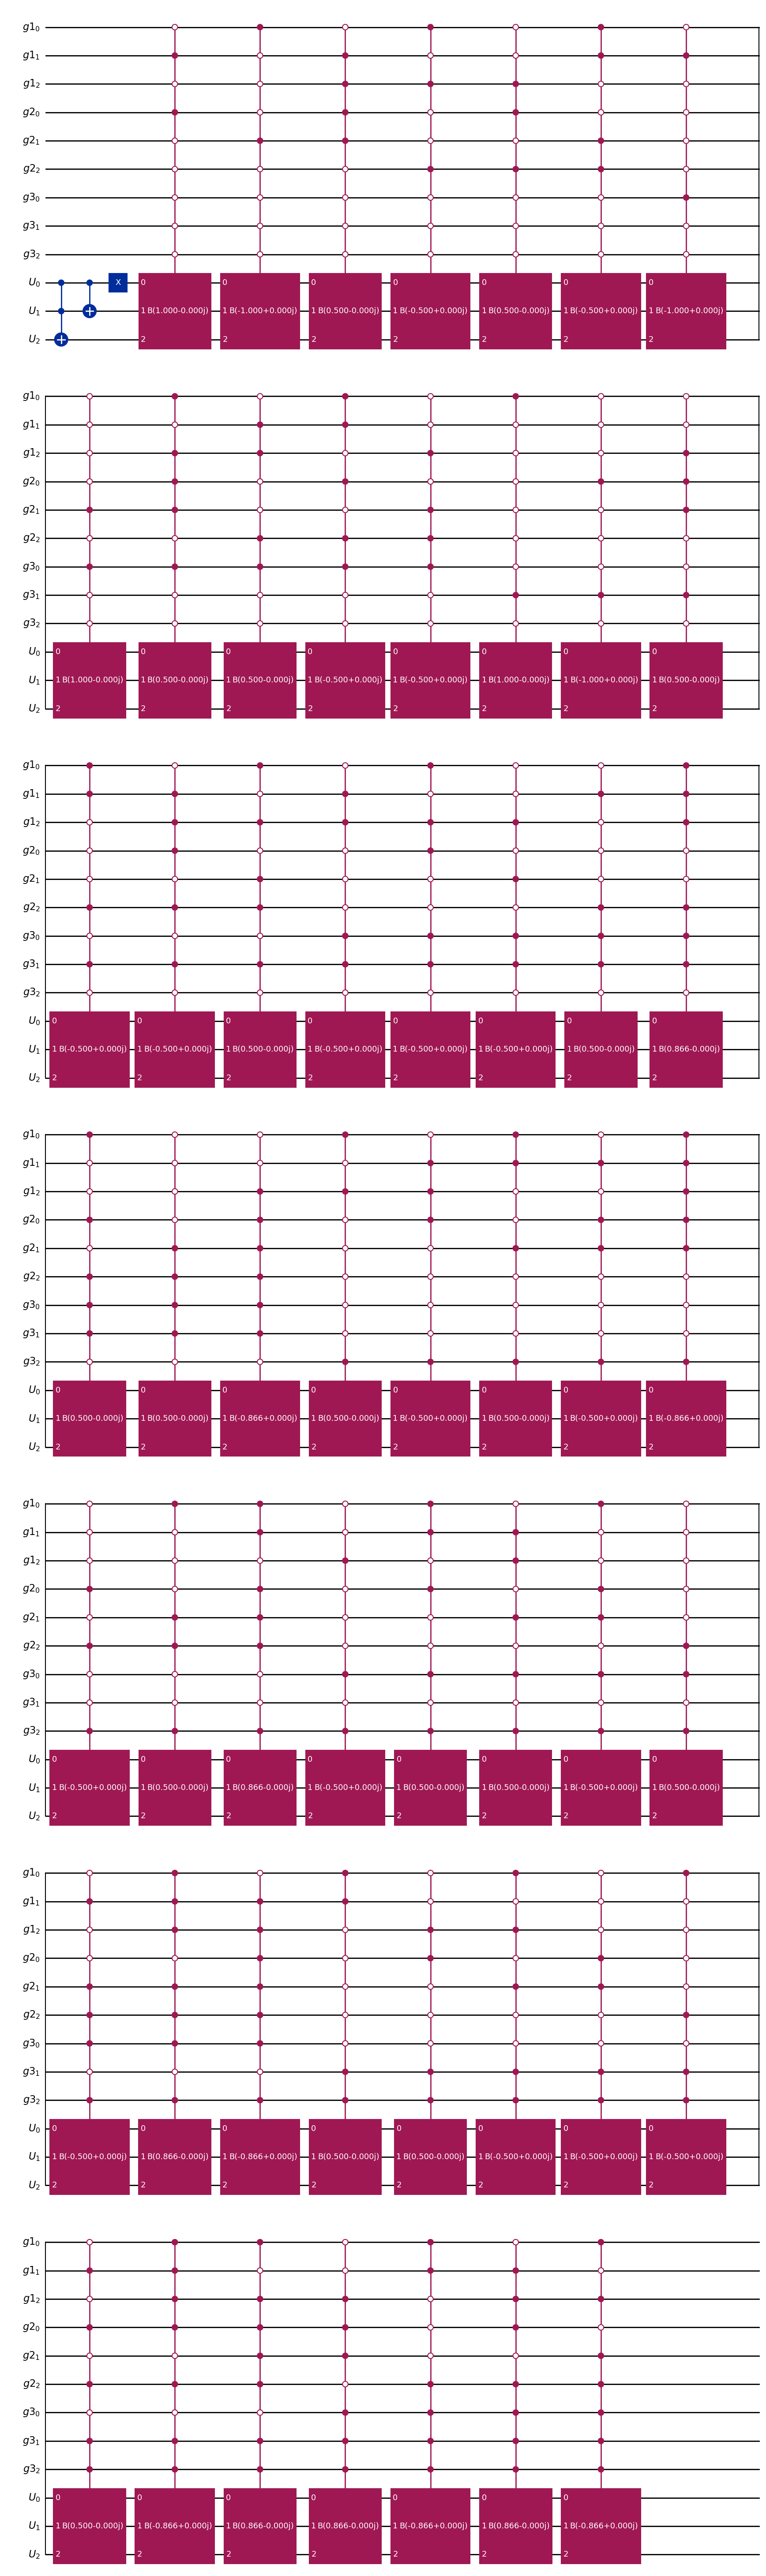

In [12]:
# G gate (complete triple-gluon vertex)
G_circ = G_gate(g1, g2, g3, U)
G_circ.draw('mpl')

<a id='circuits'></a>
## 4. Building Circuits

State preparation circuits for quarks and gluons.

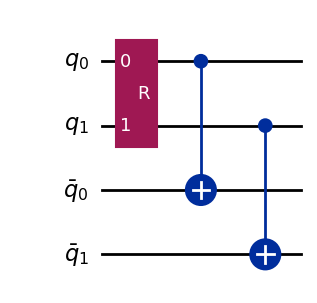

In [13]:
# Quark singlet preparation
Rq_circ = R_quark_prep(quark, anti_quark)
Rq_circ.draw('mpl')

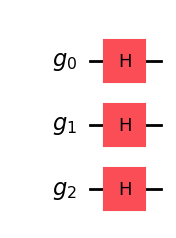

In [14]:
# Gluon superposition preparation
Rg_circ = R_gluon_prep(gluon)
Rg_circ.draw('mpl')

<a id='colour-factors'></a>
## 5. Computing Colour Factors

The main application: computing colour factors for Feynman diagrams.

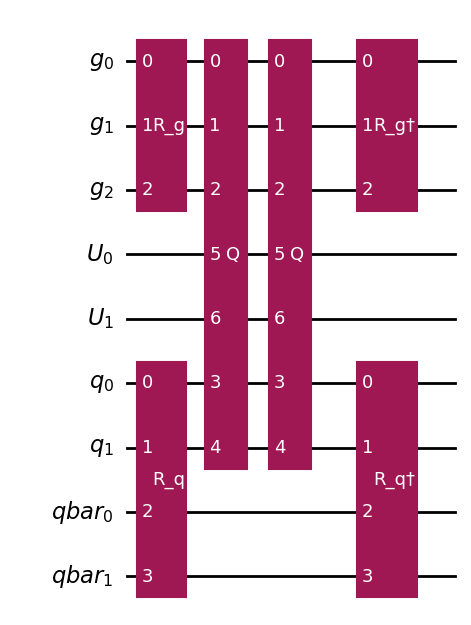

In [15]:
# Build circuit for quark emitting and absorbing a gluon
diagram_circuit = quark_emission_absorption(n_vertices=2)
diagram_circuit.draw('mpl')

In [16]:
# Compute the colour factor
C = compute_colour_factor(diagram_circuit, n_quarks=1, n_gluons=1)

print(f"Computed colour factor: C = {C}")
print(f"Real part: {C.real:.6f}")
print(f"Imaginary part: {C.imag:.6f}")

Computed colour factor: C = (3.9999999999915365+7.93052644027122e-13j)
Real part: 4.000000
Imaginary part: 0.000000


In [17]:
# Detailed output with comparison to expected value
print(format_colour_factor_result(
    diagram_circuit,
    n_quarks=1,
    n_gluons=1,
    expected=4.0
))

Colour Factor Computation Results
Normalization N = 24
Amplitude ⟨Ω|ψ⟩ = 0.166667+0.000000j
Colour factor C = N × amplitude = 4.000000+0.000000j
|C| (magnitude) = 4.000000

Expected C = 4.0
Relative error = 2.13e-12


## Summary

The QC-Amp package provides a complete toolkit for computing colour factors using quantum circuits:

1. **SU(3) utilities** for group theory calculations
2. **Quantum gates** implementing quark-gluon and triple-gluon vertices
3. **Circuit builders** for state preparation and full diagrams
4. **Colour factor computation** from circuit amplitudes

The computed colour factor C = 4 matches the expected analytical result for a quark emitting and absorbing a gluon.